# Project: Sentences similarity

## Team members:

* Khanh Duong TRAN.
* Brandon NGUELEWI TOUTSAP.

## Goal: Compare two sentences similarity by calculating Cosine similarity
### Main ideas:

#### 1. Vectorize the sentences.
#### 2. Calculate Cosine similarity.
#### 3. Compare the similarity.
#### 4. Visualization between the 2 vectors.

### We will try to compare these two sentences:

 * "The weather is hot today!"
 * "It is a hot day."

#### Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Vectorize sentences

#### Step includes:
##### 1. Process the sentences.
##### 2. Tokenize the sentences.
##### 3. Convert into array.

##### Process the sentences:
###### Step includes:

###### 1. Remove non-word character such as punctuation, numbers, emojis, etc.
###### 2. Remove redundant spaces.
###### 3. Convert all to lower case.

In [36]:
def process_sentence(sentence: str):
    """ Preprocess the sentence before converting into array.

    Argument:
    sentence: The sentence we want to preprocess.

    Output: Clean sentence.
    """
    cleaned_sentence: str = ""
    only_w: str = ''.join(char for char in sentence if char.isalpha() or char.isspace())
    no_space: str = ' '.join(only_w.split())
    to_lwer: str = no_space.lower()
    cleaned_sentence = to_lwer

    return cleaned_sentence

In [37]:
#Test the function
assert process_sentence("I haVe a nAme20") == "i have a name"

##### Tokenize the sentences:
###### Step includes:

###### 1. Split the sentences into each word individually.
###### 2. Create a vocabulary to vectorize.

In [39]:
def create_vocab(sentence):
    """ Return a dictionary of vocabulary for a list of words

    Argument:
    sentence: List of words that we want to create a dictionary of vocabulary.
    """
    unique_word_set: set = set(sorted(sentence))
    vocab: dict = {word: index for index, word in enumerate(unique_word_set)}

    return vocab

In [47]:
vocab = create_vocab(["apple", "banana", "apple", "orange", "grape", "banana"])

assert 'apple' in vocab
assert 'orange' in vocab
assert 'pear' not in vocab

##### Convert into array:
###### Base on the created vocabulary to convert a sentence into an array

In [51]:
def vectorize(words_list, vocabulary):
    """ Return the vector of the sentence.

    Argument:
    words_list: list of word to make a vector.
    vocabulary: a dictionary of vocabulary from the sentences.
    """
    sentence_vector: np.ndarray = np.zeros(len(vocabulary))

    for word in words_list:
        if word in vocabulary:
            sentence_vector[vocabulary[word]] += 1

    return sentence_vector

In [59]:
assert np.array_equal(vectorize(["apple", "banana", "apple", "orange", "grape", "banana"], {'apple': 0, 'banana': 1, 'grape': 2, 'orange': 3}), np.array([2, 2, 1, 1]))

#### Putting all together for vectorizing the sentences
##### This section summarizes all the previous steps before proceeding to the Cosine similarity calculation.

In [60]:
def process_sentence(sentence):
    """ Preprocess the sentence and convert into an array of words.

    Argument:
    sentence: The sentence we want to preprocess.

    Output: Array of words.
    """

    #Remove non-word
    cleaned_sentence: str = ''.join(char for char in sentence if char.isalpha() or char.isspace())

    #Remove redundant whitespaces
    cleaned_sentence = ' '.join(cleaned_sentence.split())

    #Convert to lowercase
    cleaned_sentence = cleaned_sentence.lower()

    return cleaned_sentence.split()

def create_vocab(sentences):
    """ Return a dictionary of vocabulary from two sentences

    Argument:
    sentences: List of sentences that we want to create a dictionary of vocabulary.
    """

    words = []
    for sentence in sentences:
        words_arr: np.ndarray = process_sentence(sentence)
        words += words_arr

    unique_word_set: set = set(sorted(words))
    vocab: dict = {word: index for index, word in enumerate(unique_word_set)}

    return vocab

def vectorize(sentence, vocabulary):
    """ Return the vector of the sentence.

    Argument:
    sentence: The sentence we want to vectorize.
    vocabulary: A dictionary of vocabulary from the predefined sentences.
    """
    sentence_vector: np.ndarray = np.zeros(len(vocabulary))

    words_list: np.ndarray = process_sentence(sentence)
    for word in words_list:
        if word in vocabulary:
            sentence_vector[vocabulary[word]] += 1

    return sentence_vector

In [19]:
sentence_1 = "The weather is hot today!"
sentence_2 = "It is a hot day."
sentences = np.array([sentence_1, sentence_2])

vocabulary = create_vocab(sentences)
print(vocabulary)

print(vectorize(sentence_1, vocabulary))
print(vectorize(sentence_2, vocabulary))

{'the': 0, 'is': 1, 'day': 2, 'today': 3, 'it': 4, 'hot': 5, 'a': 6, 'weather': 7}
[1. 1. 0. 1. 0. 1. 0. 1.]
[0. 1. 1. 0. 1. 1. 1. 0.]


In [61]:
vector_1 = vectorize(sentence_1, vocabulary)
vector_2 = vectorize(sentence_2, vocabulary)

## Calculate Cosine similarity

### The formula is:

$$
\cos(θ) =  \frac{A \cdot B}{\|A\| \times \|B\|}
$$

### Calculate the dot product of two vectors

In [86]:
def calculate_dot_product(vector1, vector2):
    """ Return the dot product of two vectors.

    Argument:
    vector1 and vector2: two vectors.
    """
    dot_product: float = 0

    #Formula: dot = a1*b1 + a2*b2 ... + an*bn, with n is the size of the array.
    dot_product = sum(vector1[i] * vector2[i] for i in range(len(vector1)))

    return dot_product

In [87]:
assert calculate_dot_product(vector_1, vector_2) == np.dot(vector_1, vector_2)

### Calculate the norm of the vectors

In [62]:
def calculate_norm(vector):
    """ Return the norm of a vector.

    Argument:
    vector: Vector we want to calculate the norm.
    """

    #Formula: squared root of the sum squared of all elements in an array.
    sum_ele: int = sum(vector[i] ** 2 for i in range(len(vector)))
    return np.sqrt(sum_ele)

In [28]:
assert calculate_norm(vector_2) == np.linalg.norm(vector_2)

### Finally, calculate the cosine similarity

In [63]:
def cosine_similarity(vector1, vector2):
    """ Return the cosine similarity of two vectors.

    Argument:
    vector1 and vector2: vectors to calculate.
    """
    dot: int = calculate_dot_product(vector1, vector2)
    norm_multi: float = calculate_norm(vector1) * calculate_norm(vector2)

    cosine: float = dot / norm_multi
    cosine_percentage = cosine * 100
    return cosine_percentage

In [64]:
similitude = cosine_similarity(vector_1, vector_2)
similitude

39.99999999999999

## Compare

### We define the threshold for the similarity is 0.5.

## Visualization

In [98]:
def visualize_2_vectors(vector_1, vector_2, similitude):
    """ Visualize the two vectors onto a 2-D dimension space with an angle in between.

    Argument:
    vector_1 and vector_2: The two vectors we want to visualize.
    similitude: The calculated Cosine similarity
    """
    angle_rad = np.arccos(similitude/100)
    angle_deg = np.degrees(angle_rad)

    plt.figure(figsize=(6, 6))

    # Plot Vector 1 as an arrow
    plt.arrow(0, 0, vector_1[0], vector_1[1], color='blue', width=0.05, label='Vector 1', alpha=0.5)
    # Plot Vector 2 as an arrow
    plt.arrow(0, 0, vector_2[0], vector_2[1], color='orange', width=0.05, label='Vector 2', alpha=0.5)

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)

    # Add the angle between vectors as text annotation
    plt.text(0.1, 1.2, f'Angle: {angle_deg:.2f}°', fontsize=12)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Vector Representation and Angle')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

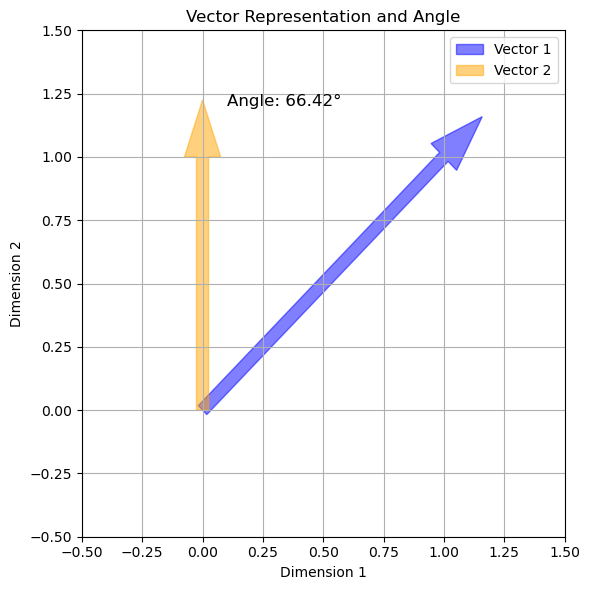

In [99]:
visualize_2_vectors(vector_1, vector_2, similitude)

## An interactive way that can take user input to compare

In [96]:
sen_1: str = input("Enter your first sentence: ")
sen_2: str = input("Enter your second sentence: ")
arr_sens: np.ndarray = np.array([sen_1, sen_2])

print(sen_1)
print(sen_2)

This Is tHe First seNtence!!
tHis is my secoNd sentence.


In [97]:
user_input_vocab: dict = create_vocab(arr_sens)

vec_1 = vectorize(sen_1, user_input_vocab)
vec_2 = vectorize(sen_2, user_input_vocab)

similarity: float = cosine_similarity(vec_1, vec_2)
print(similarity)

59.999999999999986
